Crime and weather

In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt

First I will read in both datasets as pandas dataframes

In [2]:
crimeDF= pd.read_csv("crime.csv", encoding='windows-1254')
weatherDF = pd.read_csv("weather_data_long.csv")
weatherDF['month'] = pd.DatetimeIndex(weatherDF['Date']).month
weatherDF['year'] = pd.DatetimeIndex(weatherDF['Date']).year
crimeDF['year'] = pd.DatetimeIndex(crimeDF['FIRST_OCCURRENCE_DATE']).year
crimeDF['month'] = pd.DatetimeIndex(crimeDF['FIRST_OCCURRENCE_DATE']).month


In [3]:
weatherDF= weatherDF.dropna()
weatherDF.isna().sum()

Date           0
Time           0
Temperature    0
DewPoint       0
Humidity       0
Wind           0
WinSpeed       0
WindGust       0
Pressure       0
Precip.        0
Condition      0
month          0
year           0
dtype: int64

In [4]:
crimeDF= crimeDF.dropna()
crimeDF.isna().sum()


incident_id               0
offense_id                0
OFFENSE_CODE              0
OFFENSE_CODE_EXTENSION    0
OFFENSE_TYPE_ID           0
OFFENSE_CATEGORY_ID       0
FIRST_OCCURRENCE_DATE     0
LAST_OCCURRENCE_DATE      0
REPORTED_DATE             0
INCIDENT_ADDRESS          0
GEO_X                     0
GEO_Y                     0
GEO_LON                   0
GEO_LAT                   0
DISTRICT_ID               0
PRECINCT_ID               0
NEIGHBORHOOD_ID           0
IS_CRIME                  0
IS_TRAFFIC                0
VICTIM_COUNT              0
year                      0
month                     0
dtype: int64

Quick look at the head of both dataframes to get a better idea of what I am working with

In [5]:
display(weatherDF)

,Date,Time,Temperature,DewPoint,Humidity,Wind,WinSpeed,WindGust,Pressure,Precip.,Condition,month,year
0,2002-01-01,12:53 AM,19,13,77,ENE,14,0,24.73,0.0,Cloudy,1,2002
1,2002-01-02,12:53 AM,10,-3,56,SE,5,0,24.94,0.0,Mostly Cloudy,1,2002
2,2002-01-04,12:53 AM,30,14,51,W,9,0,24.45,0.0,Partly Cloudy,1,2002
3,2002-01-05,12:53 AM,25,18,75,CALM,0,0,24.74,0.0,Mostly Cloudy,1,2002
4,2002-01-06,12:53 AM,23,9,55,SSE,13,0,24.74,0.0,Mostly Cloudy,1,2002
...,...,...,...,...,...,...,...,...,...,...,...,...,...
145228,2020-10-20,7:53 PM,48,32,54,E,6,0,24.64,0.0,Mostly Cloudy,10,2020
145229,2020-10-20,8:53 PM,45,31,58,SE,8,0,24.65,0.0,Mostly Cloudy,10,2020
145230,2020-10-20,9:53 PM,41,29,62,SSE,10,0,24.65,0.0,Partly Cloudy,10,2020
145231,2020-10-20,10:53 PM,40,29,65,SSE,12,0,24.65,0.0,Fair,10,2020


In [6]:
display(crimeDF)

,incident_id,offense_id,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,LAST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,...,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC,VICTIM_COUNT,year,month
8,2017590611,2017590611299900,2999,0,criminal-mischief-other,public-disorder,9/2/2017 2:30:00 PM,9/2/2017 5:00:00 PM,9/3/2017 11:25:00 AM,3663 S SHERIDAN BLVD,...,-105.055221,39.650424,4,423,fort-logan,1,0,1,2017,9
15,2017211064,2017211064299900,2999,0,criminal-mischief-other,public-disorder,4/1/2017 4:20:00 AM,4/1/2017 4:25:00 AM,4/1/2017 4:38:00 AM,401 S MEADE ST,...,-105.036554,39.709233,4,412,westwood,1,0,1,2017,4
16,2017864878,2017864878299900,2999,0,criminal-mischief-other,public-disorder,12/28/2017 7:00:00 PM,12/29/2017 6:36:00 AM,12/29/2017 7:51:00 AM,2141 S BROADWAY ST,...,-104.987975,39.677702,3,313,overland,1,0,1,2017,12
17,2017158231,2017158231299900,2999,0,criminal-mischief-other,public-disorder,3/8/2017 9:12:00 PM,3/9/2017 9:25:00 AM,3/9/2017 9:38:00 AM,1319 22ND ST,...,-104.990219,39.755170,6,612,five-points,1,0,1,2017,3
18,201747277,201747277299900,2999,0,criminal-mischief-other,public-disorder,1/22/2017 5:00:00 AM,1/22/2017 5:15:00 AM,1/22/2017 6:29:00 AM,2880 S LOCUST ST,...,-104.914776,39.664921,3,323,hampden,1,0,1,2017,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397580,2022485983,2022485983260900,2609,0,fraud-by-use-of-computer,white-collar-crime,9/15/2022 12:00:00 AM,9/20/2022 12:00:00 AM,9/20/2022 12:49:00 PM,1235 N GRANT ST,...,-104.983990,39.736036,6,623,capitol-hill,1,0,1,2022,9
397581,20228042873,20228042873269903,2699,3,theft-of-services,larceny,9/23/2022 7:39:00 AM,9/23/2022 8:05:00 AM,9/23/2022 8:05:00 AM,8511 PENA BLVD,...,-104.667270,39.850723,7,759,dia,1,0,1,2022,9
397582,2022491659,2022491659269903,2699,3,theft-of-services,larceny,9/23/2022 11:00:00 AM,9/23/2022 11:15:00 AM,9/23/2022 11:56:00 AM,900 W ALAMEDA AVE,...,-104.997323,39.710777,3,312,baker,1,0,1,2022,9
397586,2022493303,2022493303131506,1315,6,agg-aslt-shoot,aggravated-assault,9/24/2022 2:30:00 AM,9/24/2022 3:00:00 AM,9/24/2022 4:31:00 AM,4500 BLK E 9TH AVE,...,-104.934029,39.732320,2,222,hale,1,0,1,2022,9


In [7]:
del weatherDF['Time']


Data prep for Denver weather

In [8]:
del weatherDF["DewPoint"]
del weatherDF["WindGust"]
del weatherDF["Precip."]
# del weatherDF["Condition"]
del weatherDF["Humidity"]

In [9]:
weatherDF.isna().sum()


Date           0
Temperature    0
Wind           0
WinSpeed       0
Pressure       0
Condition      0
month          0
year           0
dtype: int64

In [10]:
display(weatherDF)

,Date,Temperature,Wind,WinSpeed,Pressure,Condition,month,year
0,2002-01-01,19,ENE,14,24.73,Cloudy,1,2002
1,2002-01-02,10,SE,5,24.94,Mostly Cloudy,1,2002
2,2002-01-04,30,W,9,24.45,Partly Cloudy,1,2002
3,2002-01-05,25,CALM,0,24.74,Mostly Cloudy,1,2002
4,2002-01-06,23,SSE,13,24.74,Mostly Cloudy,1,2002
...,...,...,...,...,...,...,...,...
145228,2020-10-20,48,E,6,24.64,Mostly Cloudy,10,2020
145229,2020-10-20,45,SE,8,24.65,Mostly Cloudy,10,2020
145230,2020-10-20,41,SSE,10,24.65,Partly Cloudy,10,2020
145231,2020-10-20,40,SSE,12,24.65,Fair,10,2020


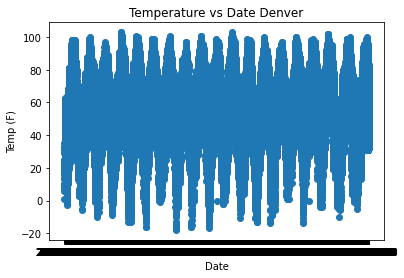

In [11]:
plt.scatter(weatherDF["Date"], weatherDF["Temperature"])
plt.title("Temperature vs Date Denver")
plt.xlabel("Date")
plt.ylabel("Temp (F)")
plt.show()


Clean up and prep of Denver Crime

break down occurrence and report date into datetime objects

Now I am going to drop the columns that I do not need/columns that are incomplete: incidentID,offenseID, offense code, offense code extension, first occurrence date, last occurrence date, reported date, victim count as well as  geo x, geo y, geo lon, geo lat

In [12]:
del crimeDF["incident_id"]
del crimeDF["offense_id"]
del crimeDF["OFFENSE_CODE"]
del crimeDF["OFFENSE_CODE_EXTENSION"]
del crimeDF["FIRST_OCCURRENCE_DATE"]
del crimeDF["LAST_OCCURRENCE_DATE"]
del crimeDF["REPORTED_DATE"]
del crimeDF["VICTIM_COUNT"]
del crimeDF["GEO_X"]
del crimeDF["GEO_Y"]
del crimeDF["GEO_LON"]
del crimeDF["GEO_LAT"]
del crimeDF["DISTRICT_ID"]
del crimeDF["PRECINCT_ID"]
del crimeDF["NEIGHBORHOOD_ID"]
del crimeDF["IS_CRIME"]
del crimeDF["IS_TRAFFIC"]

In [13]:
del crimeDF["INCIDENT_ADDRESS"]

Exploratory analysis

Count the amount of occurrences by offense type ID

theft-of-motor-vehicle       37185
theft-items-from-vehicle     33924
theft-parts-from-vehicle     19775
criminal-mischief-mtr-veh    17217
theft-other                  15047
                             ...  
prostitution-pimping             1
bigamy                           1
homicide-conspiracy              1
probation-violation              1
homicide-negligent               1
Name: OFFENSE_TYPE_ID, Length: 163, dtype: int64


Text(0, 0.5, 'Number of Occurrences')

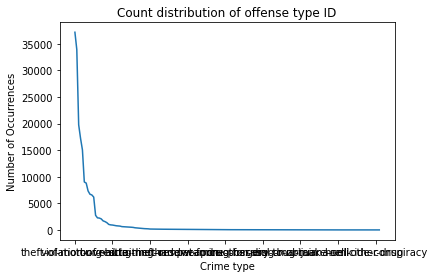

In [14]:
# print(crimeDF["OFFENSE_TYPE_ID"].value_counts())
offenseType =(crimeDF["OFFENSE_TYPE_ID"].value_counts())
print(offenseType)
crimeDF.shape
ax = offenseType.plot(title="Count distribution of offense type ID")
ax.set_xlabel("Crime type")
ax.set_ylabel("Number of Occurrences")


# print(crimeDF["OFFENSE_CATEGORY_ID"].value_counts())
# print(crimeDF["DISTRICT_ID"].value_counts())
# print(crimeDF["PRECINCT_ID"].value_counts())
# print(crimeDF["NEIGHBORHOOD_ID"].value_counts())
# print(crimeDF["IS_CRIME"].value_counts())
# print(crimeDF["IS_TRAFFIC"].value_counts())

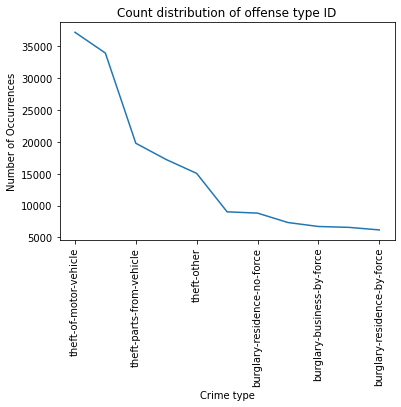

In [15]:
res = crimeDF[~crimeDF['OFFENSE_TYPE_ID'].isin(offenseType[offenseType < 5000].index)]

# print(res)
ax = (res["OFFENSE_TYPE_ID"].value_counts()).plot(title="Count distribution of offense type ID")
ax.set_xlabel("Crime type")
ax.set_ylabel("Number of Occurrences")
plt.xticks(rotation=90)
plt.show()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


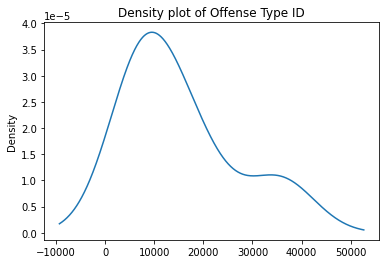

In [16]:
ax2 =(res["OFFENSE_TYPE_ID"].value_counts()).plot.kde(title="Density plot of Offense Type ID")

group by type: within type
offense category id

In [17]:
offenseCategory =(crimeDF["OFFENSE_CATEGORY_ID"].value_counts())
print("Offense Types in Denver and Occurrence count")
print(offenseCategory)

Offense Types in Denver and Occurrence count
theft-from-motor-vehicle        53699
auto-theft                      38017
larceny                         34216
public-disorder                 29436
burglary                        25084
all-other-crimes                 5280
other-crimes-against-persons     4042
aggravated-assault               3345
white-collar-crime               3152
robbery                          1822
drug-alcohol                      529
arson                             178
murder                            107
Name: OFFENSE_CATEGORY_ID, dtype: int64


<AxesSubplot:ylabel='Density'>

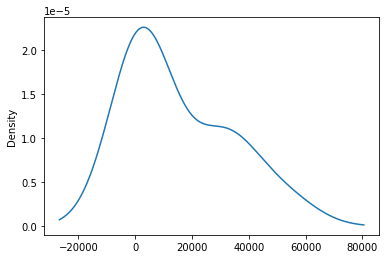

In [18]:
offenseCategory.plot.kde()

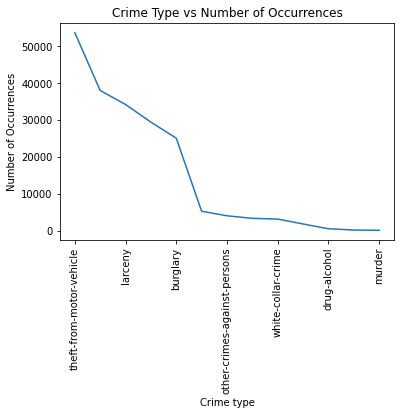

In [19]:
ax = offenseCategory.plot(title="Crime Type vs Number of Occurrences")
plt.xticks(rotation=90)
ax.set_xlabel("Crime type")
ax.set_ylabel("Number of Occurrences")

plt.show()

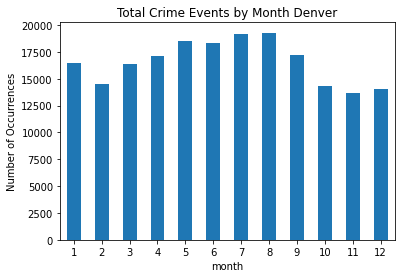

In [23]:

ax = crimeDF.groupby("month").size().plot(kind = "bar", title= "Total Crime Events by Month Denver")
ax.set_ylabel("Number of Occurrences")
plt.xticks(rotation=0)
plt.show()

Merging data on date of occurrence from crime and date from weather

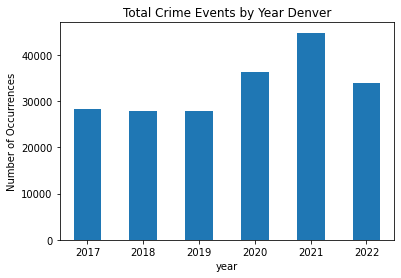

In [24]:
ax = crimeDF.groupby("year").size().plot(kind = "bar", title= "Total Crime Events by Year Denver")
ax.set_ylabel("Number of Occurrences")
plt.xticks(rotation=0)
plt.show()

In [29]:
weather = weatherDF.groupby('Date').max()
weather

,Temperature,Wind,WinSpeed,Pressure,Condition,month,year
Date,,,,,,,
2002-01-01,23,WNW,14,24.95,Mostly Cloudy,1,2002
2002-01-02,35,WSW,14,24.95,Partly Cloudy,1,2002
2002-01-04,36,WSW,21,24.73,Partly Cloudy,1,2002
2002-01-05,40,WSW,14,24.79,Partly Cloudy,1,2002
2002-01-06,42,SSW,13,24.83,Partly Cloudy,1,2002
...,...,...,...,...,...,...,...
2020-10-11,78,WSW,40,24.65,Partly Cloudy,10,2020
2020-10-12,75,WSW,31,24.65,Fair / Windy,10,2020
2020-10-13,80,WSW,28,24.76,Partly Cloudy,10,2020


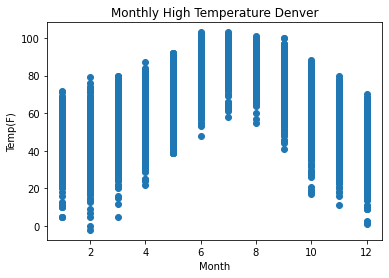

In [37]:
plt.scatter(weather["month"], weather["Temperature"])
plt.title("Monthly High Temperature Denver")
plt.xlabel("Month")
plt.ylabel("Temp(F)")
plt.show()

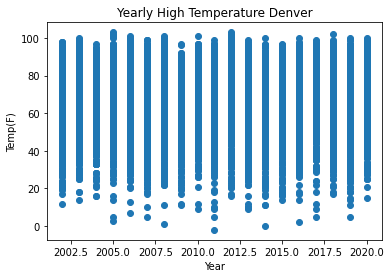

In [38]:
plt.scatter(weather["year"], weather["Temperature"])
plt.title("Yearly High Temperature Denver")
plt.xlabel("Year")
plt.ylabel("Temp(F)")
plt.show()

Works Cited:
https://medium.com/analytics-vidhya/how-to-pd-merge-two-data-frames-on-a-common-date-column-e7808d7ccaee 
https://towardsdatascience.com/analysis-of-nyc-reported-crime-data-using-pandas-821753cd7e22


crimeDF